In [1]:
# This notebook is used to compare connectivity maps of two ROIs
# import
from nilearn import datasets
from nilearn import surface
from nilearn import plotting
import numpy as np
import pandas as pd
import glob
import os
#import scipy as scp
from nilearn import signal
from scipy import stats
import nibabel as nib
from os.path import exists
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Define our data and set paths
subs = ['107', '108', '173', '230', '309', '984', '1210', '1211', '1215','1234', '1335','1339','1380','1452','1453']
sessions = ['1','2','3','4']
runs = ['1','2']
saveFigs = True # Save png files of connectivity maps
saveMaps = True # Save actual connectivity map as a curv file that can 
# be loaded to Freeview
saveGroup = True

datadir = '/scratch/groups/jyeatman/LMB_BIDS/derivatives/fmriprep/'
roidir =  '/scratch/groups/jyeatman/visfAtlas/FreeSurfer/'

# Where to save outputs: 
surfacedir = '/scratch/users/mayay/LMB_FC/statMaps/'
imagedir =  '/scratch/users/mayay/LMB_FC/images/'

if not exists(surfacedir):
     os.makedirs(surfacedir)

if not exists(imagedir):
     os.makedirs(imagedir)

# TBD - get these numbers from data
timepoints = 375;
TR = 0.82
# drop first 6 timepoints
droptp = [0,1,2,3,4,5]
fd_thresh = 0.5
fd_vol_thresh = 90 # include only scans with >90% usable volumes

In [5]:
# Define ROIs
roi1_name = 'MPM_lh_OTS'
roi2_name = 'MPM_lh_pOTS'

# run on subset of data for debugging
subs = ['107'] # First run on a single subject
sessions = ['1'] # 1-4

# Load fsaverage
fsaverage = datasets.fetch_surf_fsaverage('fsaverage')

# Load LH surface to get its size
white_left = surface.load_surf_data(fsaverage['white_left'])

# Allocate empty array for group data - n vertices * N subjects
group_map = np.zeros(shape = (len(subs),white_left[0].shape[0]))
sub_count = len(subs)
print('Running on ' + str(sub_count) + ' subjects')

Running on 1 subjects


In [6]:
# Load group ROI maps
for sesid in sessions:
    roi1_path = glob.glob(surfacedir + 'GroupMap_ses-' + sesid + '_' + roi1_name + '*.npy')
    print(roi1_path)
    roi1_group = np.load(roi1_path[0])
    roi2_path = glob.glob(surfacedir + 'GroupMap_ses-' + sesid + '_' + roi2_name + '*.npy')
    print(roi2_path)
    roi2_group = np.load(roi2_path[0])

['/scratch/users/mayay/LMB_FC/statMaps/GroupMap_ses-1_MPM_lh_OTS_N14.npy', '/scratch/users/mayay/LMB_FC/statMaps/GroupMap_ses-1_MPM_lh_OTS_N2.npy']
['/scratch/users/mayay/LMB_FC/statMaps/GroupMap_ses-1_MPM_lh_pOTS_N14.npy']


In [8]:
roi2_group.shape

(163842, 15)

In [26]:
# remove rows having all zeroes - hard-coded
roi1_group_clean = np.delete(roi1_group,[1],axis=1)
roi2_group_clean = np.delete(roi2_group,[1],axis=1)

In [27]:
print(roi2_group_clean.shape)

(163842, 14)


In [30]:
group_mean = np.mean(roi1_group, axis = 1)

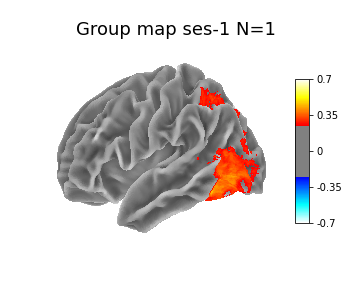

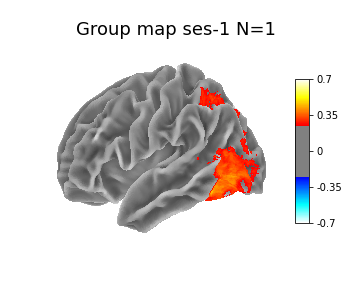

In [33]:
plotting.plot_surf_stat_map(fsaverage['white_left'], stat_map=group_mean,
hemi='left', threshold = .25, vmax=0.7, view='lateral', colorbar=True,
bg_map=fsaverage['curv_left'],title='Group map ses-' + sesid + ' N=' + str(sub_count), output_file = None)

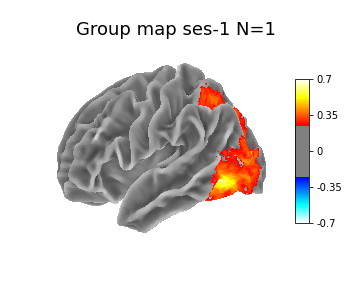

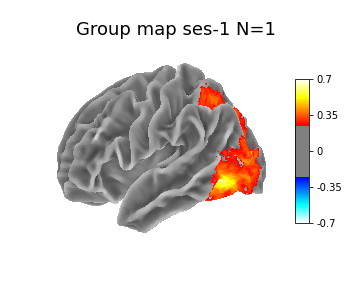

In [34]:
group_mean2 = np.mean(roi2_group, axis = 1)
plotting.plot_surf_stat_map(fsaverage['white_left'], stat_map=group_mean2,
hemi='left', threshold = .25, vmax=0.7, view='lateral', colorbar=True,
bg_map=fsaverage['curv_left'],title='Group map ses-' + sesid + ' N=' + str(sub_count), output_file = None)

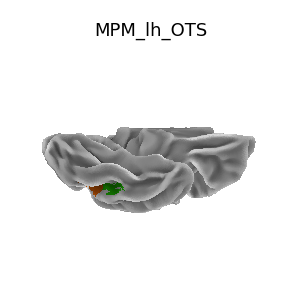

In [47]:
cur_roi = surface.load_surf_data(roidir + roi1_name + '.label')
roi_map = np.zeros(group_mean.shape[0])
roi_map[cur_roi] = 1

cur_roi = surface.load_surf_data(roidir + roi2_name + '.label')
roi_map[cur_roi] = 2

plotting.plot_surf_roi(fsaverage['white_left'], roi_map=roi_map, hemi='left', view='ventral',
bg_map=fsaverage['curv_left'], bg_on_data=True, title=roi1_name)
print()
plotting.plot_surf_roi(fsaverage['white_left'], roi_map=roi_map, hemi='left', view='lateral',
bg_map=fsaverage['curv_left'], bg_on_data=True, title=roi1_name)
print()

In [49]:
# Calculate T-test
stats.ttest_ind(roi1_group,roi2_group,nan_policy='omit')

Ttest_indResult(statistic=masked_array(data=[38.797506336798214, --, 20.729342649889478,
                   5.074751048532074, 30.419680467299322,
                   6.171730120647147, 38.77838706733247,
                   -31.18979212043025, 24.157176473059298,
                   29.055308235495918, -25.230268254073927,
                   1.7808690220386645, -16.831336353036527,
                   0.7568041112493935, -28.793741409360663],
             mask=[False,  True, False, False, False, False, False, False,
                   False, False, False, False, False, False, False],
       fill_value=1e+20), pvalue=masked_array(data=[0.0, --, 2.1980991926959228e-95,
                   3.8823463220749194e-07, 6.160758697599733e-203,
                   6.763271110119364e-10, 0.0, 3.224994293576337e-213,
                   8.341932401712322e-129, 2.3892623425499826e-185,
                   2.6160374895935785e-140, 0.07493486228290562,
                   1.5383575268426577e-63, 0.44916782377